In [126]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler
from scipy.cluster.vq import kmeans,vq
from scipy.cluster.hierarchy import fcluster,linkage
from scipy.stats.mstats import winsorize
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [127]:
df=pd.read_csv('/content/Train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [128]:
df.Class.value_counts()

Class
0    1620
1     143
Name: count, dtype: int64

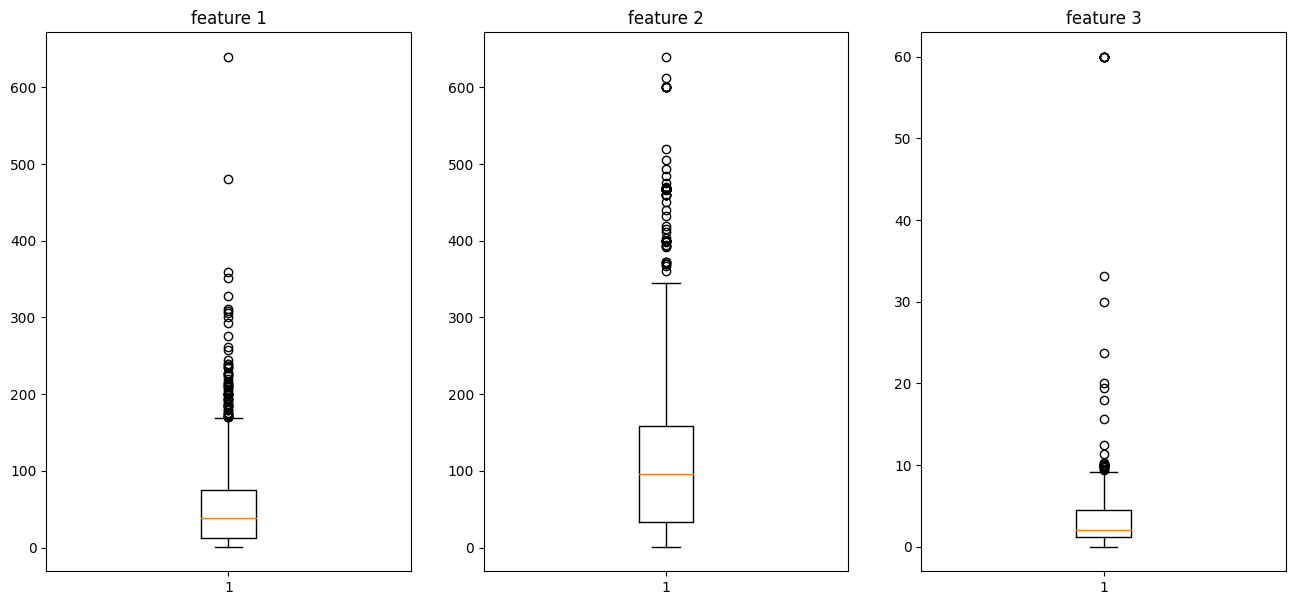

In [129]:

fig, axs =  plt.subplots(1,3,figsize = (16,7))
for i in range(3):
    axs[i].set_title(f'feature {i+1}')
    axs[i].boxplot(df[f'feature_{i+1}'])

In [130]:
for col in df.columns[:3]:
    l=0.1 if col=='feature_2' else 0.05
    df[col]=winsorize(df[col],limits=l)
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,8.4166,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


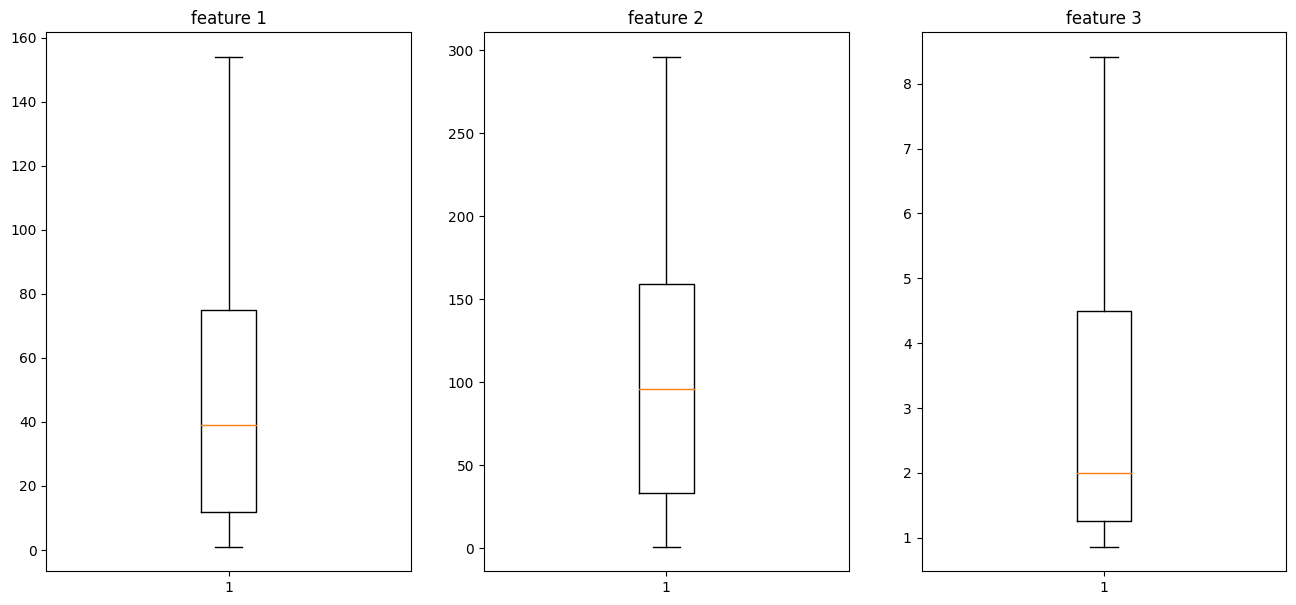

In [131]:
fig, axs =  plt.subplots(1,3,figsize = (16,7))
for i in range(3):
    axs[i].set_title(f'feature {i+1}')
    axs[i].boxplot(df[f'feature_{i+1}'])

In [132]:
df2=pd.DataFrame(StandardScaler().fit_transform(df.iloc[:,:3]),columns=df.columns[:3])
df=pd.concat([df2,df.iloc[:,3:]],axis=1)
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,1.078244,0.536706,-0.617120,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.657223,-0.302744,0.401092,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1.056550,0.427686,-0.651021,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.223356,-0.771527,-0.856700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.830770,1.343449,2.104740,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-1.069396,-1.196703,-0.457401,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,-0.223356,0.972783,0.740496,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,0.991470,1.169018,-0.349271,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,-0.743996,-0.324548,0.765452,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
x = df.drop('Class',axis=1)
y = df['Class']

In [134]:
from imblearn.over_sampling import SMOTE

def over_sample_train_test(x,y):
    ros=SMOTE()
    x_res,y_res=ros.fit_resample(x,y)
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state = 1)
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test=over_sample_train_test(x,y)

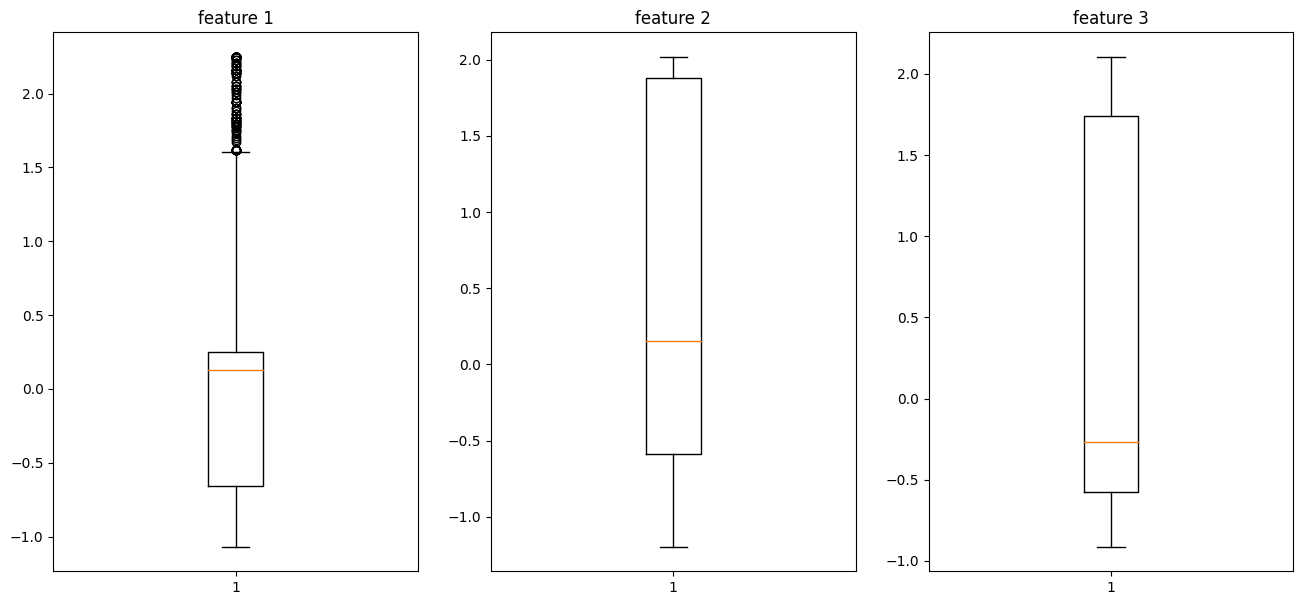

In [135]:
fig, axs =  plt.subplots(1,3,figsize = (16,7))
for i in range(3):
    axs[i].set_title(f'feature {i+1}')
    axs[i].boxplot(x_train[f'feature_{i+1}'])

In [136]:

import pandas as pd
pca = PCA(n_components=3)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

x_train_pca = pd.DataFrame(x_train_pca, columns=['pca_1', 'pca_2', 'pca_3'])
x_test_pca = pd.DataFrame(x_test_pca, columns=['pca_1', 'pca_2', 'pca_3'])


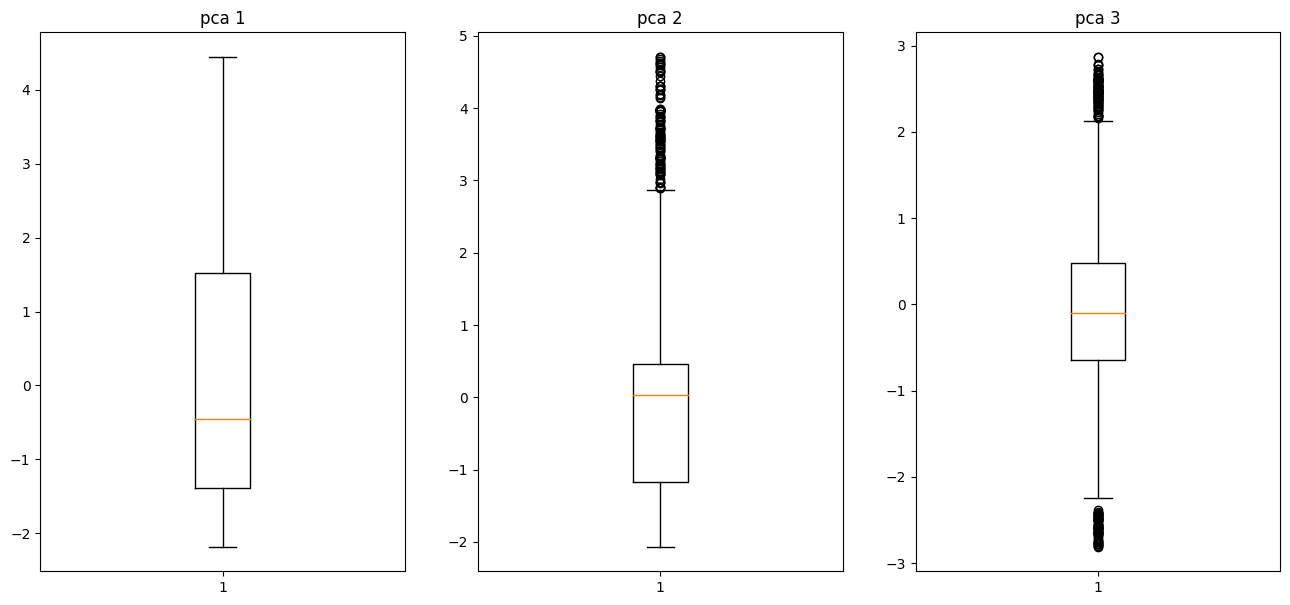

In [137]:
fig, axs =  plt.subplots(1,3,figsize = (16,7))
for i in range(3):
    axs[i].set_title(f'pca {i+1}')
    axs[i].boxplot(x_train_pca[f'pca_{i+1}'])

In [138]:
x_train_pca.shape

(2592, 3)

In [139]:
lr=LogisticRegression(solver='liblinear')
svm=SVC(probability=True)
dt=DecisionTreeClassifier(max_depth=10,max_features=8,random_state=100)
rf=RandomForestClassifier(max_depth=4, max_features=3)
knn=KNeighborsClassifier(n_neighbors=94)
gnb=GaussianNB()
xgb=xgb=XGBClassifier(use_label_encoder=False,random_state=42,eval_metric='mlogloss')



In [151]:
def apply_model(model,x_train,x_test,y_train,y_test):
    print(' '*20+re.search(r'(.*)\(',f'''{model}''',re.M).group(1))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('')
    print('Train Score:  ',model.score(x_train,y_train))
    print('Test Score:   ',model.score(x_test,y_test))
    print('')
    print(classification_report(y_test,y_pred))


                    LogisticRegression

Train Score:   0.7770061728395061
Test Score:    0.7777777777777778

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       328
           1       0.84      0.68      0.75       320

    accuracy                           0.78       648
   macro avg       0.79      0.78      0.78       648
weighted avg       0.79      0.78      0.78       648



## **Without Dimensionality Reduction**

In [152]:

apply_model(lr,x_train,x_test,y_train,y_test)

                    LogisticRegression

Train Score:   0.9270833333333334
Test Score:    0.9074074074074074

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       328
           1       0.88      0.94      0.91       320

    accuracy                           0.91       648
   macro avg       0.91      0.91      0.91       648
weighted avg       0.91      0.91      0.91       648



In [141]:
apply_model(svm,x_train,x_test,y_train,y_test)

                    SVC

Train Score:   0.9506172839506173
Test Score:    0.9135802469135802

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       328
           1       0.87      0.97      0.92       320

    accuracy                           0.91       648
   macro avg       0.92      0.91      0.91       648
weighted avg       0.92      0.91      0.91       648



In [142]:
apply_model(rf,x_train,x_test,y_train,y_test)

                    RandomForestClassifier

Train Score:   0.8171296296296297
Test Score:    0.8240740740740741

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       328
           1       0.90      0.73      0.80       320

    accuracy                           0.82       648
   macro avg       0.84      0.82      0.82       648
weighted avg       0.84      0.82      0.82       648



In [143]:


apply_model(xgb,x_train,x_test,y_train,y_test)

                    XGBClassifier

Train Score:   0.9594907407407407
Test Score:    0.9135802469135802

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       328
           1       0.90      0.93      0.91       320

    accuracy                           0.91       648
   macro avg       0.91      0.91      0.91       648
weighted avg       0.91      0.91      0.91       648



In [144]:
apply_model(knn,x_train,x_test,y_train,y_test)

                    KNeighborsClassifier

Train Score:   0.6184413580246914
Test Score:    0.6033950617283951

              precision    recall  f1-score   support

           0       1.00      0.22      0.36       328
           1       0.55      1.00      0.71       320

    accuracy                           0.60       648
   macro avg       0.78      0.61      0.53       648
weighted avg       0.78      0.60      0.53       648



In [145]:
apply_model(gnb,x_train,x_test,y_train,y_test)

                    GaussianNB

Train Score:   0.8969907407407407
Test Score:    0.8842592592592593

              precision    recall  f1-score   support

           0       0.96      0.80      0.88       328
           1       0.83      0.97      0.89       320

    accuracy                           0.88       648
   macro avg       0.89      0.89      0.88       648
weighted avg       0.90      0.88      0.88       648



In [146]:
apply_model(dt,x_train,x_test,y_train,y_test)

                    DecisionTreeClassifier

Train Score:   0.6770833333333334
Test Score:    0.6728395061728395

              precision    recall  f1-score   support

           0       0.62      0.94      0.74       328
           1       0.87      0.40      0.55       320

    accuracy                           0.67       648
   macro avg       0.74      0.67      0.64       648
weighted avg       0.74      0.67      0.65       648



## **PCA**

In [153]:
apply_model(lr,x_train_pca,x_test_pca,y_train,y_test)

                    LogisticRegression

Train Score:   0.9270833333333334
Test Score:    0.9074074074074074

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       328
           1       0.88      0.94      0.91       320

    accuracy                           0.91       648
   macro avg       0.91      0.91      0.91       648
weighted avg       0.91      0.91      0.91       648



In [155]:
apply_model(dt,x_train_pca,x_test_pca,y_train,y_test)

                    DecisionTreeClassifier

Train Score:   0.933641975308642
Test Score:    0.845679012345679

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       328
           1       0.84      0.85      0.84       320

    accuracy                           0.85       648
   macro avg       0.85      0.85      0.85       648
weighted avg       0.85      0.85      0.85       648



In [156]:
apply_model(gnb,x_train_pca,x_test_pca,y_train,y_test)

                    GaussianNB

Train Score:   0.7858796296296297
Test Score:    0.7870370370370371

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       328
           1       0.86      0.68      0.76       320

    accuracy                           0.79       648
   macro avg       0.80      0.79      0.78       648
weighted avg       0.80      0.79      0.78       648



In [157]:
apply_model(knn,x_train_pca,x_test_pca,y_train,y_test)

                    KNeighborsClassifier

Train Score:   0.8186728395061729
Test Score:    0.8009259259259259

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       328
           1       0.82      0.77      0.79       320

    accuracy                           0.80       648
   macro avg       0.80      0.80      0.80       648
weighted avg       0.80      0.80      0.80       648



In [158]:
apply_model(xgb,x_train_pca,x_test_pca,y_train,y_test)

                    XGBClassifier

Train Score:   0.9710648148148148
Test Score:    0.8564814814814815

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       328
           1       0.83      0.89      0.86       320

    accuracy                           0.86       648
   macro avg       0.86      0.86      0.86       648
weighted avg       0.86      0.86      0.86       648



In [159]:
apply_model(rf,x_train_pca,x_test_pca,y_train,y_test)

                    RandomForestClassifier

Train Score:   0.8294753086419753
Test Score:    0.8225308641975309

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       328
           1       0.86      0.77      0.81       320

    accuracy                           0.82       648
   macro avg       0.83      0.82      0.82       648
weighted avg       0.83      0.82      0.82       648



In [160]:
apply_model(svm,x_train_pca,x_test_pca,y_train,y_test)

                    SVC

Train Score:   0.7905092592592593
Test Score:    0.7932098765432098

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       328
           1       0.87      0.68      0.77       320

    accuracy                           0.79       648
   macro avg       0.81      0.79      0.79       648
weighted avg       0.81      0.79      0.79       648



## **SVD**


In [163]:

import pandas as pd
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
svd.fit(x_train)

x_train_svd = svd.transform(x_train)
x_test_svd = svd.transform(x_test)

x_train_svd = pd.DataFrame(x_train_svd, columns=['svd_1', 'svd_2', 'svd_3'])
x_test_svd = pd.DataFrame(x_test_svd, columns=['svd_1', 'svd_2', 'svd_3'])



In [164]:
apply_model(lr,x_train_svd,x_test_svd,y_train,y_test)

                    LogisticRegression

Train Score:   0.7573302469135802
Test Score:    0.7700617283950617

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       328
           1       0.82      0.68      0.75       320

    accuracy                           0.77       648
   macro avg       0.78      0.77      0.77       648
weighted avg       0.78      0.77      0.77       648



In [166]:
apply_model(knn,x_train_svd,x_test_svd,y_train,y_test)

                    KNeighborsClassifier

Train Score:   0.8001543209876543
Test Score:    0.7839506172839507

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       328
           1       0.81      0.73      0.77       320

    accuracy                           0.78       648
   macro avg       0.79      0.78      0.78       648
weighted avg       0.79      0.78      0.78       648



In [167]:
apply_model(svm,x_train_svd,x_test_svd,y_train,y_test)

                    SVC

Train Score:   0.7916666666666666
Test Score:    0.7932098765432098

              precision    recall  f1-score   support

           0       0.74      0.90      0.82       328
           1       0.87      0.68      0.76       320

    accuracy                           0.79       648
   macro avg       0.81      0.79      0.79       648
weighted avg       0.81      0.79      0.79       648



In [168]:
apply_model(xgb,x_train_svd,x_test_svd,y_train,y_test)

                    XGBClassifier

Train Score:   0.966820987654321
Test Score:    0.8549382716049383

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       328
           1       0.82      0.90      0.86       320

    accuracy                           0.85       648
   macro avg       0.86      0.86      0.85       648
weighted avg       0.86      0.85      0.85       648



In [169]:
apply_model(rf,x_train_svd,x_test_svd,y_train,y_test)

                    RandomForestClassifier

Train Score:   0.8036265432098766
Test Score:    0.7947530864197531

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       328
           1       0.88      0.68      0.77       320

    accuracy                           0.79       648
   macro avg       0.81      0.79      0.79       648
weighted avg       0.81      0.79      0.79       648



In [170]:
apply_model(dt,x_train_svd,x_test_svd,y_train,y_test)

                    DecisionTreeClassifier

Train Score:   0.9124228395061729
Test Score:    0.8379629629629629

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       328
           1       0.83      0.84      0.84       320

    accuracy                           0.84       648
   macro avg       0.84      0.84      0.84       648
weighted avg       0.84      0.84      0.84       648



In [165]:
apply_model(gnb,x_train_svd,x_test_svd,y_train,y_test)

                    GaussianNB

Train Score:   0.7870370370370371
Test Score:    0.7885802469135802

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       328
           1       0.86      0.68      0.76       320

    accuracy                           0.79       648
   macro avg       0.80      0.79      0.79       648
weighted avg       0.80      0.79      0.79       648

